In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [2]:
data = './data/cats_and_dogs_small'
print(os.listdir(data))

['test', 'train', 'validation']


In [3]:
train_transforms = transforms.Compose([transforms.Resize((150, 150)),
                                       transforms.RandomRotation(40),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomAffine(degrees = 40, translate = (0.2, 0.2)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transforms = transforms.Compose([transforms.Resize((150, 150)),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
trainset = torchvision.datasets.ImageFolder(root = os.path.join(data, 'train'), 
                                           transform = train_transforms)

testset = torchvision.datasets.ImageFolder(root = os.path.join(data, 'test'),
                                          transform = test_transforms)

dataloaders = {'train': torch.utils.data.DataLoader(trainset, batch_size = 20, shuffle = True,
                                                   num_workers = 4),
              'val': torch.utils.data.DataLoader(testset, batch_size = 20, shuffle = False,
                                                num_workers = 4)}

dataset_sizes = {'train': len(trainset), 'val': len(testset)}

In [5]:
print(dataset_sizes)

{'train': 2000, 'val': 1000}


In [6]:
def imshow(img):
    img = img / 2 + 0.5
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.show()

In [7]:
imgs, lbls = next(iter(dataloaders['train']))

In [8]:
imgs[0].shape

torch.Size([3, 150, 150])

In [9]:
class_names = ['cat', 'dog']

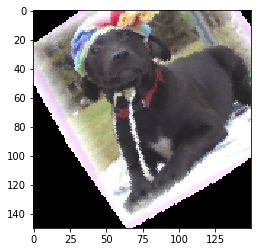

In [10]:
imshow(imgs[3])

In [11]:
class_names[lbls[3].item()]

'dog'

## Network

In [12]:
model = torchvision.models.vgg16(pretrained = True)

In [13]:
for name, param in model.named_parameters():
    print(name)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.5.weight
features.5.bias
features.7.weight
features.7.bias
features.10.weight
features.10.bias
features.12.weight
features.12.bias
features.14.weight
features.14.bias
features.17.weight
features.17.bias
features.19.weight
features.19.bias
features.21.weight
features.21.bias
features.24.weight
features.24.bias
features.26.weight
features.26.bias
features.28.weight
features.28.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


In [14]:
'''
for name, param in model.named_parameters():
    if not 'classifier' in name:
        param.requires_grad = False
'''

"\nfor name, param in model.named_parameters():\n    if not 'classifier' in name:\n        param.requires_grad = False\n"

In [15]:
for param in model.parameters():
    param.requires_grad = False

In [16]:
model.training

True

In [17]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [18]:
num_ftrs = model.classifier[0].in_features
print(num_ftrs)

25088


In [19]:
model.classifier = nn.Sequential(nn.Linear(num_ftrs, 256),
                                nn.ReLU(),
                                nn.Linear(256, 2))

In [20]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [21]:
print('total parameters:', sum(p.numel() for p in model.parameters()))
print('trainable parameters:', sum(p.numel() for p in model.parameters() if p.requires_grad))
print('non-trainable parameters:', sum(p.numel() for p in model.parameters() if not p.requires_grad))

total parameters: 21137986
trainable parameters: 6423298
non-trainable parameters: 14714688


In [22]:
def train_model(model, criterion, optimizer, num_epochs = 30):
    best_model_wts = deepcopy(model.state_dict())
    best_acc = 0.
    
    loss_lst, val_loss_lst = list(), list()
    acc_lst, val_acc_lst = list(), list()
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += (preds == labels).sum().item()
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            print('{} loss: {:.4f}, Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            if phase == 'train':
                loss_lst.append(epoch_loss)
                acc_lst.append(epoch_acc)
            else:
                val_loss_lst.append(epoch_loss)
                val_acc_lst.append(epoch_acc)
            
            if phase == 'val' and epoch_acc > best_acc :
                best_acc = epoch_acc
                best_model_wts = deepcopy(model.state_dict())
        
        print()
        
    print('Best val_acc: {:.4f}'.format(best_acc))
    model.load_state_dict(best_model_wts)
    return model, loss_lst, val_loss_lst, acc_lst, val_acc_lst

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.classifier.parameters(), lr = 2e-5)

In [24]:
num_epochs = 30

In [25]:
model, loss, val_loss, acc, val_acc = train_model(model, criterion, optimizer, num_epochs = num_epochs)

Epoch 1/30
----------
train loss: 0.3639, Acc: 0.8360
val loss: 0.1091, Acc: 0.9560

Epoch 2/30
----------
train loss: 0.2686, Acc: 0.8840
val loss: 0.1010, Acc: 0.9600

Epoch 3/30
----------
train loss: 0.2448, Acc: 0.8945
val loss: 0.1107, Acc: 0.9610

Epoch 4/30
----------
train loss: 0.2341, Acc: 0.8980
val loss: 0.1097, Acc: 0.9600

Epoch 5/30
----------
train loss: 0.2376, Acc: 0.8965
val loss: 0.1143, Acc: 0.9630

Epoch 6/30
----------
train loss: 0.2164, Acc: 0.9060
val loss: 0.1079, Acc: 0.9630

Epoch 7/30
----------
train loss: 0.2297, Acc: 0.9010
val loss: 0.1074, Acc: 0.9620

Epoch 8/30
----------
train loss: 0.2147, Acc: 0.9125
val loss: 0.1042, Acc: 0.9650

Epoch 9/30
----------
train loss: 0.2075, Acc: 0.9120
val loss: 0.1107, Acc: 0.9640

Epoch 10/30
----------
train loss: 0.2200, Acc: 0.9040
val loss: 0.1064, Acc: 0.9660

Epoch 11/30
----------
train loss: 0.2166, Acc: 0.9080
val loss: 0.1023, Acc: 0.9650

Epoch 12/30
----------
train loss: 0.2088, Acc: 0.9160
val loss

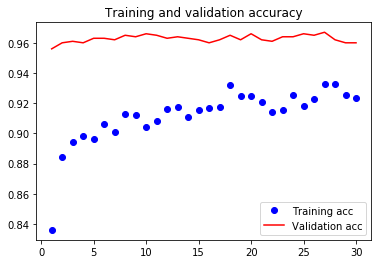

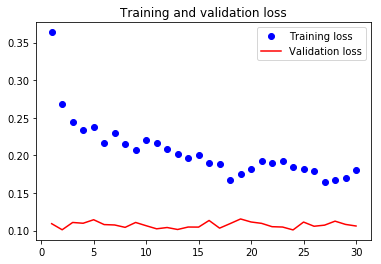

In [26]:
epochs = range(1, num_epochs + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()